## 导入相应的包

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None

## 加载数据

加载数据集和查看前面几行数据

In [3]:
train_df = pd.read_json("train.json")
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street


这个数据集含有数值型特征、类别性特征、日期特征、文本串特征、图片特征。把测试集也加载进来，查看数据集和测试集的数量。

In [4]:
test_df = pd.read_json("test.json")
print("训练集样本数量：", train_df.shape[0])
print("测试集样本数量：", test_df.shape[0])

训练集样本数量： 49352
测试集样本数量： 74659


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49352 entries, 10 to 99994
Data columns (total 15 columns):
bathrooms          49352 non-null float64
bedrooms           49352 non-null int64
building_id        49352 non-null object
created            49352 non-null object
description        49352 non-null object
display_address    49352 non-null object
features           49352 non-null object
interest_level     49352 non-null object
latitude           49352 non-null float64
listing_id         49352 non-null int64
longitude          49352 non-null float64
manager_id         49352 non-null object
photos             49352 non-null object
price              49352 non-null int64
street_address     49352 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 6.0+ MB


In [6]:
train_df.describe()

,bathrooms,bedrooms,latitude,listing_id,longitude,price
count,49352.00000,49352.000000,49352.000000,4.935200e+04,49352.000000,4.935200e+04
mean,1.21218,1.541640,40.741545,7.024055e+06,-73.955716,3.830174e+03
std,0.50142,1.115018,0.638535,1.262746e+05,1.177912,2.206687e+04
min,0.00000,0.000000,0.000000,6.811957e+06,-118.271000,4.300000e+01
25%,1.00000,1.000000,40.728300,6.915888e+06,-73.991700,2.500000e+03
50%,1.00000,1.000000,40.751800,7.021070e+06,-73.977900,3.150000e+03
75%,1.00000,2.000000,40.774300,7.128733e+06,-73.954800,4.100000e+03
max,10.00000,8.000000,44.883500,7.753784e+06,0.000000,4.490000e+06


**查看是否有"miss values"**

In [7]:
train_df.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

## 数据分析

### 查看每个特征的分布

注意：离群点(outliers) 和异常点

#### 目标变量（标签）

在深入探究数据特征之前，我们先看一下标签数据：“interest level”（感兴趣程度）

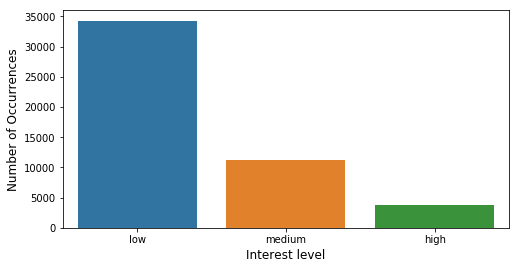

In [8]:
#int_level = train_df['interest_level'].value_counts()
plt.figure(figsize=(8,4))
#sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
order = ['low', 'medium', 'high']
sns.countplot(train_df.interest_level, order=order)
plt.ylabel('Number of Occurrences', fontsize=12) #出现的频次
plt.xlabel('Interest level', fontsize=12)
plt.show()

### 数值型特征
我们从数据集呈现的数值型特征开始：
1. bathrooms
2. bedrooms
3. price
4. latitude
5. longitude

最后两个实际上不是数值型特征，我们现在暂且当做数值型特征。

#### Bathrooms

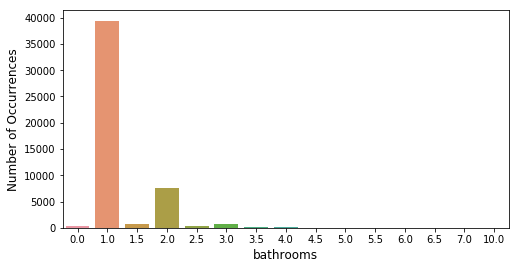

In [9]:
#cnt_btr = train_df['bathrooms'].value_counts()
plt.figure(figsize=(8,4))
# sns.barplot(cnt_btr.index, cnt_btr.values, alpha=0.8, color=color[0])

sns.countplot(train_df.bathrooms);
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

查看bathroom与标签之间的关系，不同的interest_level下的bathrooms散点图：stripplot散点图有时会重叠，所以打点时有某种随机的jitter

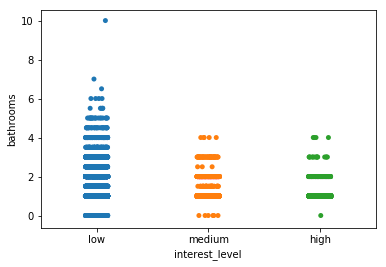

In [10]:
order = ['low', 'medium', 'high']
sns.stripplot(train_df.interest_level, train_df.bathrooms, jitter=True, order=order)

这里有一个浴室数量为10的house，我们视为离群点（outlier），去掉这个离群点（outlier），然后重新画图。

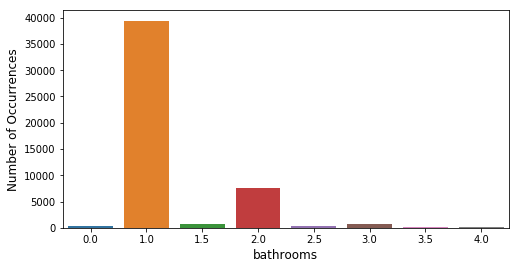

In [11]:
ulimit = np.percentile(train_df.bathrooms.values, 99.5)
ulimit = np.ceil(ulimit)
train_df.bathrooms.loc[train_df.bathrooms > ulimit] = ulimit

#cnt_btr = train_df['bathrooms'].value_counts()
plt.figure(figsize=(8,4))
# sns.barplot(cnt_btr.index, cnt_btr.values, alpha=0.8, color=color[0])

sns.countplot(train_df.bathrooms);
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

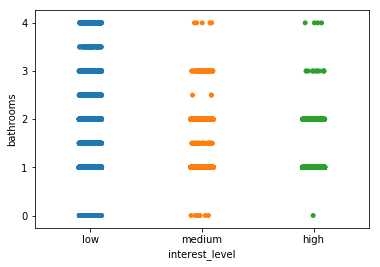

In [12]:
order = ['low', 'medium', 'high']
sns.stripplot(train_df.interest_level, train_df.bathrooms, jitter=True, order=order)

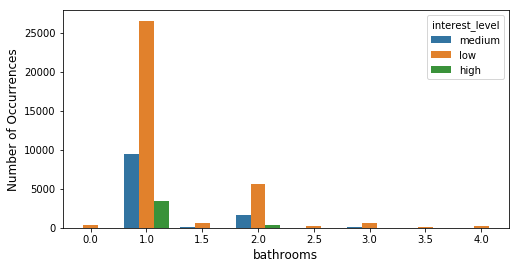

In [13]:
#cnt_btr = train_df['bathrooms'].value_counts()
plt.figure(figsize=(8,4))
# sns.barplot(cnt_btr.index, cnt_btr.values, alpha=0.8, color=color[0])

sns.countplot(train_df.bathrooms, hue="interest_level", data = train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

没有bathroom的房子只有low interest

#### Bedrooms

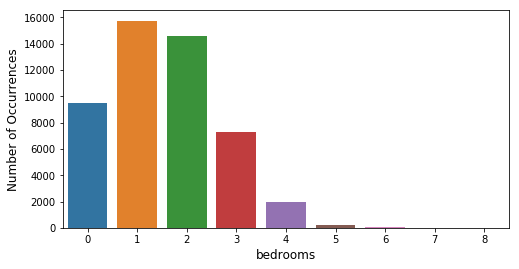

In [14]:
#cnt_btr = train_df['bathrooms'].value_counts()
plt.figure(figsize=(8,4))
# sns.barplot(cnt_btr.index, cnt_btr.values, alpha=0.8, color=color[0])

sns.countplot(train_df.bedrooms)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

查看bedroom这个特征与标签数据的联系,stipplot是分布散点图

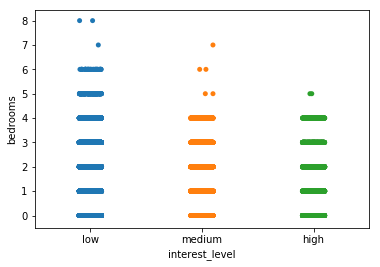

In [15]:
order = ['low', 'medium', 'high']
sns.stripplot(train_df.interest_level, train_df.bedrooms, jitter=True, order=order)

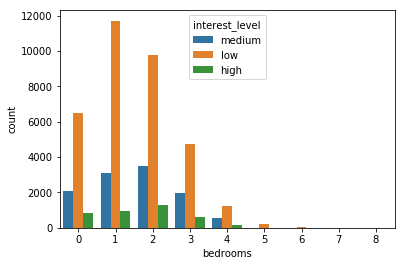

In [16]:
order = ['low', 'medium', 'high']
sns.countplot(x="bedrooms", hue="interest_level", data = train_df)

#### Price 

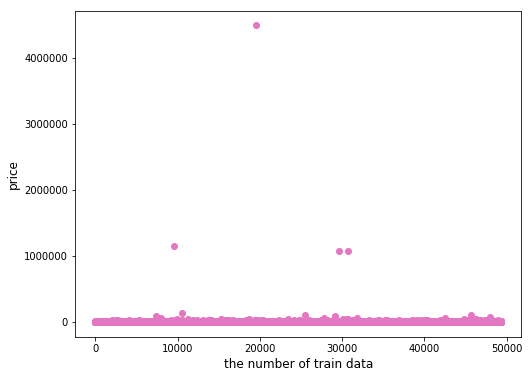

In [17]:
plt.figure(figsize=(8,6))
#plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.scatter(range(train_df.shape[0]), train_df.price.values, color = color[6])
plt.xlabel('the number of train data', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

由散点图看出，在这个特征上，有一些离群点，移除掉它们，重新画图。

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


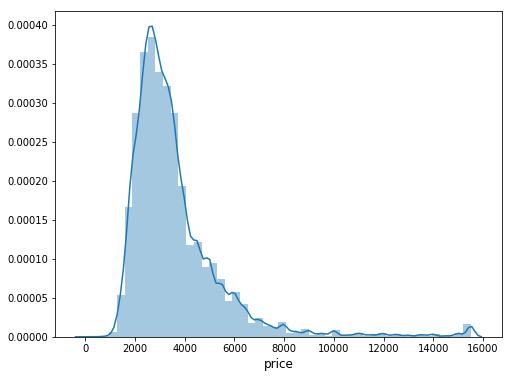

In [18]:
ulimit = np.percentile(train_df.price.values, 99.5)
#print(ulimit)
train_df['price'].loc[train_df['price'] > ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

这个分布向右倾斜的厉害，我们可以使用 `numpy.log` 函数使其变的近似正态分布。

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


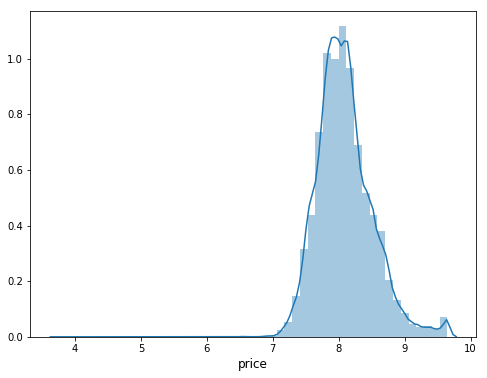

In [19]:
train_df['price'].loc[train_df['price'] > ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(np.log(train_df.price.values), bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

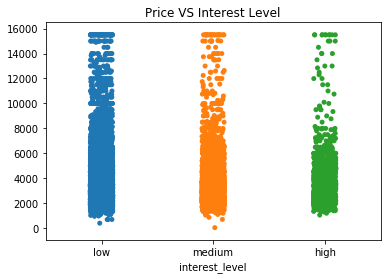

In [20]:
order = ['low', 'medium', 'high']
sns.stripplot(train_df.interest_level, train_df.price.values, jitter=True, order=order)
plt.title("Price VS Interest Level")
plt.show()

low interest的price看起来分布比较均匀，中度（medium）感兴趣的价格分布更窄，high interest level的 price分布最窄，基本分布在 1500~ 8000 之间

**violinplot** 提供不同类别条件下特征更多的分部信息
核密度估计（KDE）
三个4分位数（quartile）：1/4, 1/2, 3/4
1.5倍四分数间距（nterquartile range, IQR）
IQR ：第三四分位数和第一分位数的区别（即Q1~Q3的差距），表示变量的分散情况，播放差更稳健的统计量

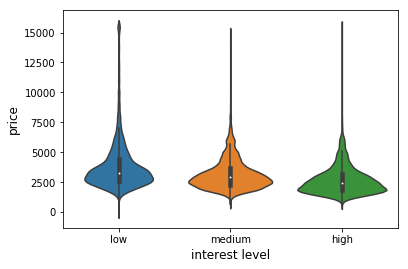

In [21]:
order = ['low', 'medium', 'high']
sns.violinplot(x="interest_level", y = 'price', data = train_df, order = order)
plt.xlabel("interest level", fontsize = 12)
plt.ylabel('price', fontsize = 12)
plt.show()

#### Longitude & Latitude
经度和维度是虽是数值型变量，但其物理含义是房屋的地理位置。

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


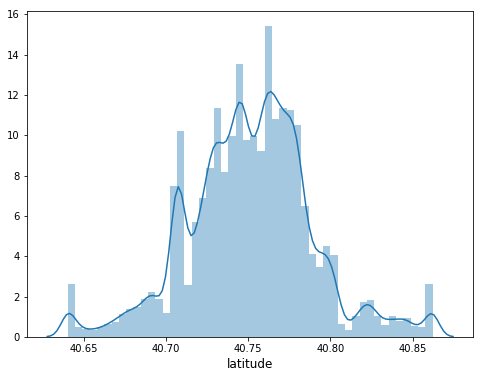

In [22]:
llimit = np.percentile(train_df.latitude.values, 1)
ulimit = np.percentile(train_df.latitude.values, 99)
train_df['latitude'].loc[train_df['latitude'] < llimit] = llimit
train_df['latitude'].loc[train_df['latitude'] > ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.latitude.values, bins=50, kde=True)
plt.xlabel('latitude', fontsize=12)
plt.show()

大部分地方纬度都在40.60~40.90之间

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


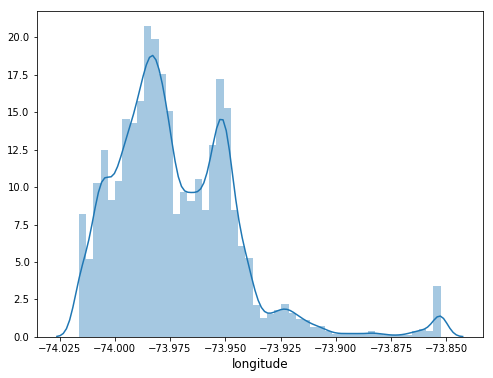

In [23]:
llimit = np.percentile(train_df.longitude.values, 1)
ulimit = np.percentile(train_df.longitude.values, 99)
train_df['longitude'].loc[train_df['longitude'] < llimit] = llimit
train_df['longitude'].loc[train_df['longitude'] > ulimit] = ulimit

plt.figure(figsize=(8, 6))
sns.distplot(train_df.longitude.values, bins=50, kde=True)
plt.xlabel('longitude', fontsize=12)
plt.show()

地方经度都分布在-73.850~74.025之间，因此这个数据是跟纽约城相关的

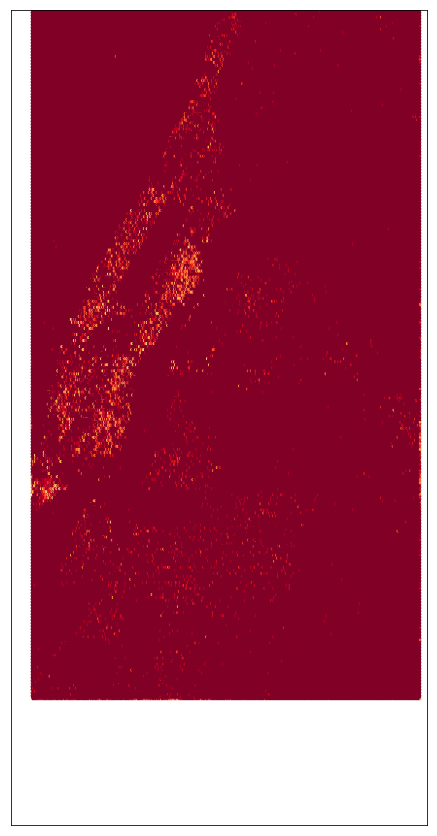

In [24]:
from mpl_toolkits.basemap import Basemap
from matplotlib import cm

west, south, east, north = -74.025, 40.60, -73.850, 40.86

fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111)
m = Basemap(projection='merc', llcrnrlat=south, urcrnrlat=north,
            llcrnrlon=west, urcrnrlon=east, lat_ts=south, resolution='i')
x, y = m(train_df['longitude'].values, train_df['latitude'].values)
m.hexbin(x, y, gridsize=400,
         bins='log', cmap=cm.YlOrRd_r);

Text(27.965277777777786, 0.5, 'Latitude')

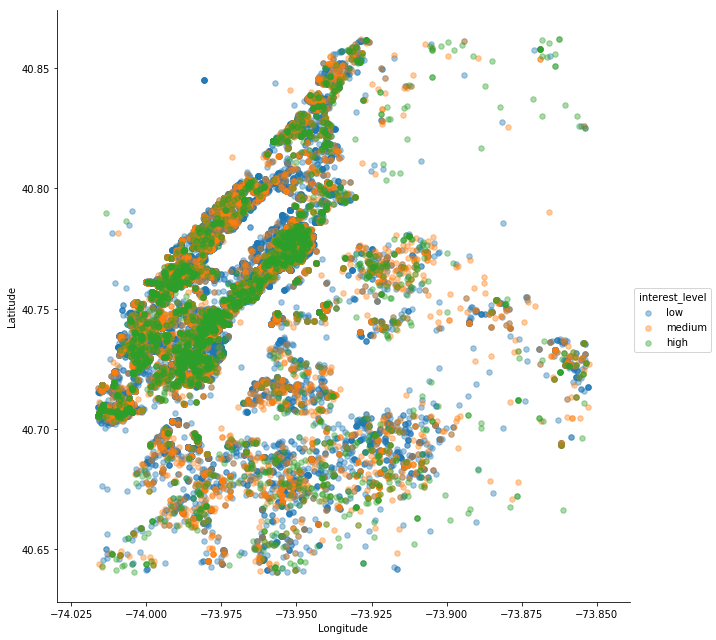

In [25]:
sns.lmplot(x = "longitude" , y = "latitude" , fit_reg = False , hue = 'interest_level',
           hue_order = ['low', 'medium', 'high'] , size = 9, scatter_kws = {'alpha':0.4,'s':30},
           data = train_df[(train_df.longitude > train_df.longitude.quantile(0.005))
                           &(train_df.longitude < train_df.longitude.quantile(0.995))
                           &(train_df.latitude > train_df.latitude.quantile(0.005))                           
                           &(train_df.latitude < train_df.latitude.quantile(0.995))]
          )
plt.xlabel('Longitude')
plt.ylabel('Latitude')

上述显示去掉了经度和纬度偏大或偏小的数据点。可以看出higt interet的房屋在一小段很集中。

还有一种作图，我就不列出来了，需要安装工具包：

```python
import gpxpy as gpx import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

for index, row in train.iterrows():

#print (row['latitude'], row['longitude'])

if row['interest_level'] == 'high': #opting for all nominals results in poor performance of Google Earth    gps_waypoint = gpxpy.gpx.GPXWaypoint(row['latitude'],row['longitude'],elevation=10)    gpx.waypoints.append(gps_waypoint)

filename = "GoogleEarth.gpx" FILE = open(filename,"w") FILE.writelines(gpx.to_xml()) FILE.close()
```

### 类别型特征

#### display_address

Display_address that appear less than 2 times: 63.22%
Display_address that appear less than 10 times: 89.6%
Display_address that appear less than 50 times: 97.73%
Display_address that appear less than 100 times: 99.26%
Display_address that appear less than 500 times: 100.0%


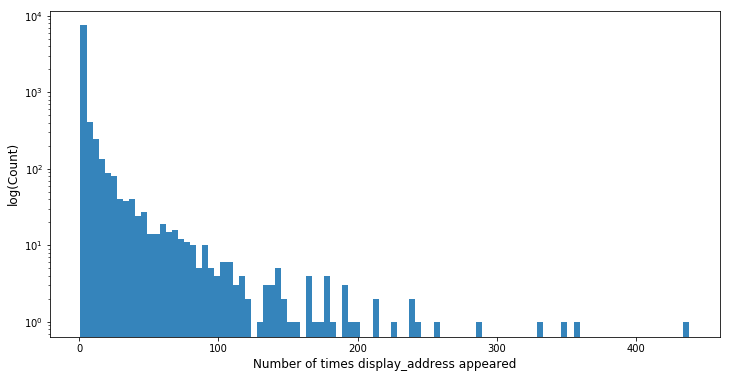

In [26]:
cnt_srs = train_df.groupby('display_address')['display_address'].count()

for i in [2, 10, 50, 100, 500]:
    print('Display_address that appear less than {} times: {}%'.format(i, round((cnt_srs < i).mean() * 100, 2)))

plt.figure(figsize=(12, 6))
plt.hist(cnt_srs.values, bins=100, log=True, alpha=0.9)
plt.xlabel('Number of times display_address appeared', fontsize=12)
plt.ylabel('log(Count)', fontsize=12)
plt.show()

大部分display_address出现次数都少于100次，没有display_address出现次数超过500次的

让我们看看前10个display_address:

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


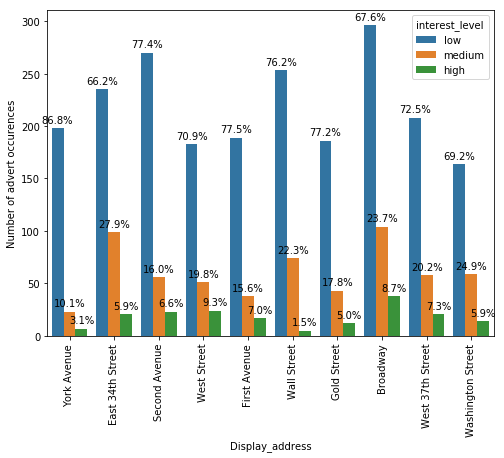

In [27]:
top10_addr = train_df.display_address.value_counts().nlargest(10).index.tolist()

fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x="display_address", hue="interest_level", data=train_df[train_df.display_address.isin(top10_addr)])

plt.xlabel('Display_address')
plt.ylabel('Number of advert occurences')
plt.tick_params(
    axis='x', #变化应用于x轴
    which='both', # major ticket和minor tickets都会受到影响
    bottom='on', # 打开沿着底端边缘的tickets
    top='off', # 关闭沿着顶端边缘的tickets
    labelbottom='on') # 打开底端的label

plt.xticks(rotation='vertical')

### Adding percentitles over bars 
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol= int(len(height) / 3)
total = [height[i] + height[i + ncol] + height[i + 2 * ncol] for i in range(ncol)]
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, height[i] + 5, '{:0.1%}'.format(height[i] /total[i % ncol]), 
           ha = "center")

#### Created

In [28]:
train_df["created"] = pd.to_datetime(train_df["created"])
train_df["date_created"] = train_df["created"].dt.date
train_df["year_created"] = train_df["created"].dt.year
train_df["month_created"] = train_df["created"].dt.month
train_df['hour_created'] = train_df['created'].dt.hour
train_df['weekday_created'] = train_df['created'].dt.weekday
train_df['quarter_created'] = train_df['created'].dt.quarter
train_df['weekend_created'] = ((train_df['weekday_created'] == 5) & (train_df['weekday_created'] == 6))

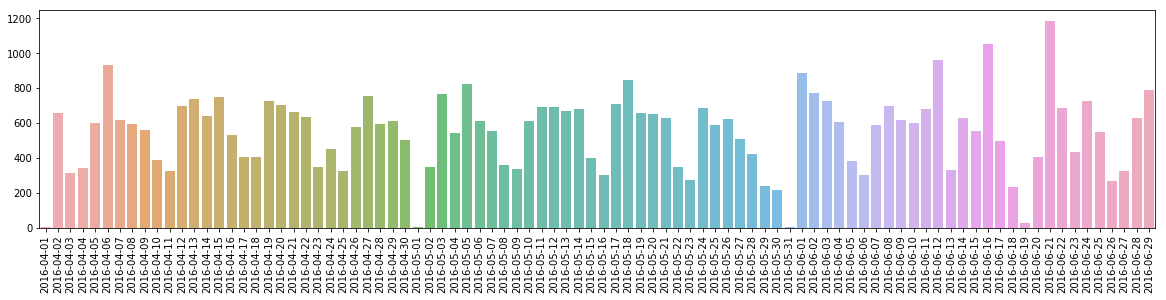

In [29]:
cnt_srs = train_df['date_created'].value_counts().sort_index()

plt.figure(figsize=(20,4))
ax = sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

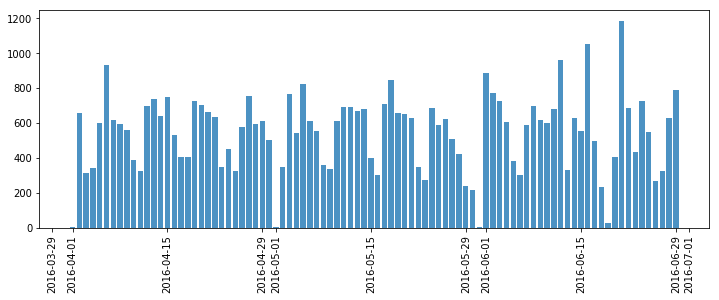

In [30]:
cnt_srs = train_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

**注意**：让我们看看测试集是否与训练集在同一个时间段

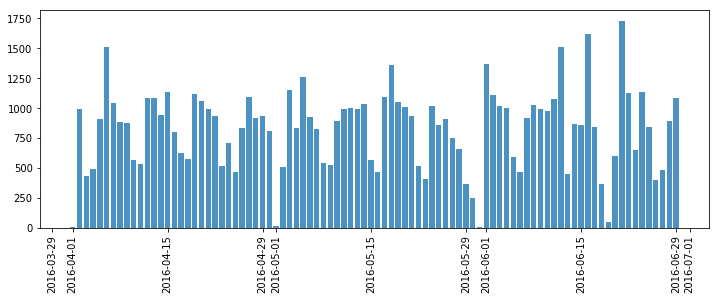

In [31]:
test_df["created"] = pd.to_datetime(test_df["created"])
test_df["date_created"] = test_df["created"].dt.date
cnt_srs = test_df['date_created'].value_counts()

plt.figure(figsize=(12,4))
ax = plt.subplot(111)
ax.bar(cnt_srs.index, cnt_srs.values, alpha=0.8)
ax.xaxis_date()
plt.xticks(rotation='vertical')
plt.show()

更细致地来看看是数据在以小时为单位的范围分布情况

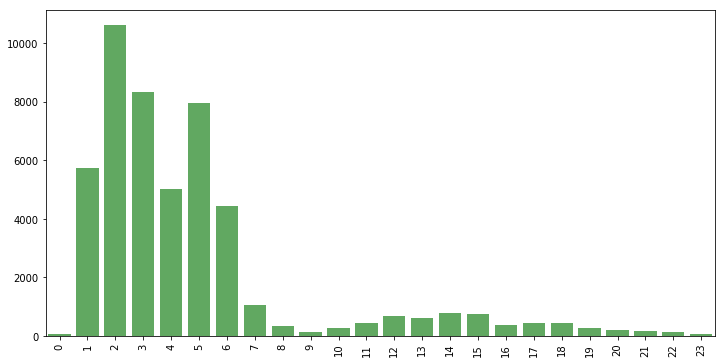

In [32]:
train_df["hour_created"] = train_df["created"].dt.hour
cnt_srs = train_df['hour_created'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.xticks(rotation='vertical')
plt.show()

数据主要分布在一天中的头几个小时，或许是这时候网络流量比较少，数据更新正在进行。

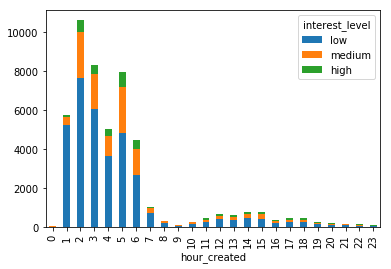

In [33]:
hourDF = train_df.groupby(['hour_created', 'interest_level'])['hour_created'].count().unstack()
hourDF[['low', 'medium', 'high']].plot(kind='bar', stacked=True)

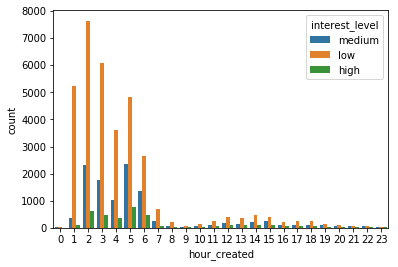

In [34]:
order = ['low', 'medium', 'high']
sns.countplot(x="hour_created", hue="interest_level", data = train_df)

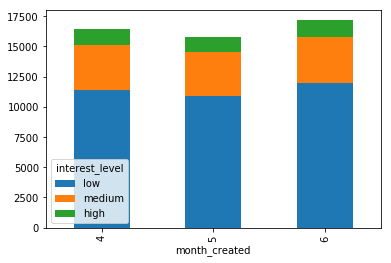

In [35]:
hourDF = train_df.groupby(['month_created', 'interest_level'])['month_created'].count().unstack()
hourDF[['low', 'medium', 'high']].plot(kind='bar', stacked=True)

#### building_id

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


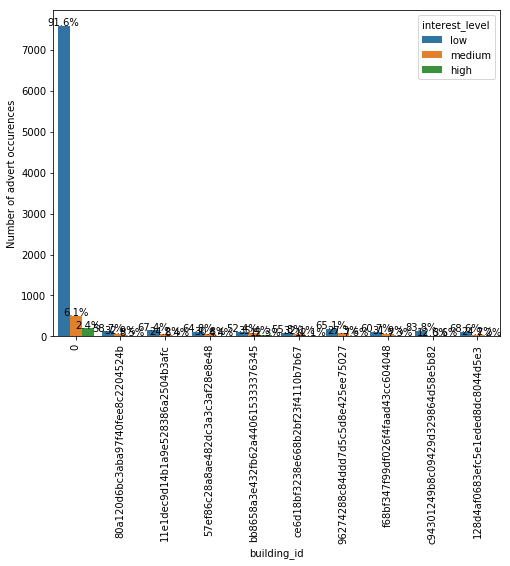

In [36]:
top10_building_id = train_df.building_id.value_counts().nlargest(10).index.tolist()

fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x="building_id", hue="interest_level", data=train_df[train_df.building_id.isin(top10_building_id)])

plt.xlabel('building_id')
plt.ylabel('Number of advert occurences')
plt.tick_params(
    axis='x', #变化应用于x轴
    which='both', # major ticket和minor tickets都会受到影响
    bottom='on', # 打开沿着底端边缘的tickets
    top='off', # 关闭沿着顶端边缘的tickets
    labelbottom='on') # 打开底端的label

plt.xticks(rotation='vertical')

### Adding percentitles over bars 
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol= int(len(height) / 3)
total = [height[i] + height[i + ncol] + height[i + 2 * ncol] for i in range(ncol)]
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, height[i] + 5, '{:0.1%}'.format(height[i] /total[i % ncol]), 
           ha = "center")

#### manager_id

C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


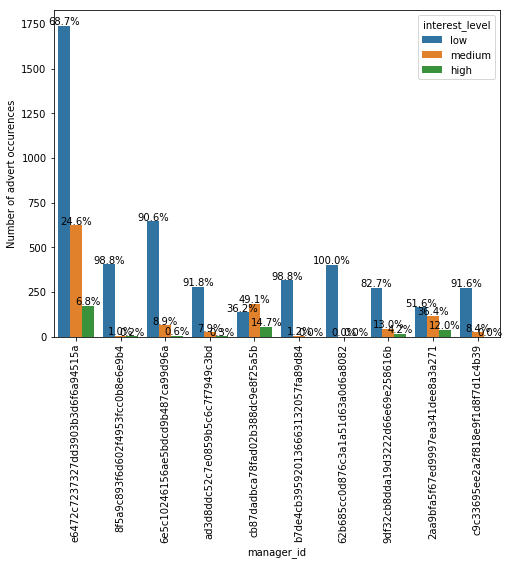

In [37]:
top10_managers = train_df.manager_id.value_counts().nlargest(10).index.tolist()

fig = plt.figure(figsize=(8, 6))
ax = sns.countplot(x="manager_id", hue="interest_level", data=train_df[train_df.manager_id.isin(top10_managers)])

plt.xlabel('manager_id')
plt.ylabel('Number of advert occurences')
plt.tick_params(
    axis='x', #变化应用于x轴
    which='both', # major ticket和minor tickets都会受到影响
    bottom='on', # 打开沿着底端边缘的tickets
    top='off', # 关闭沿着顶端边缘的tickets
    labelbottom='on') # 打开底端的label

plt.xticks(rotation='vertical')

### Adding percentitles over bars 
height = [0 if np.isnan(p.get_height()) else p.get_height() for p in ax.patches]
ncol= int(len(height) / 3)
total = [height[i] + height[i + ncol] + height[i + 2 * ncol] for i in range(ncol)]
for i, p in enumerate(ax.patches):
    ax.text(p.get_x() + p.get_width() / 2, height[i] + 5, '{:0.1%}'.format(height[i] /total[i % ncol]), 
           ha = "center")

#### listing_id

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


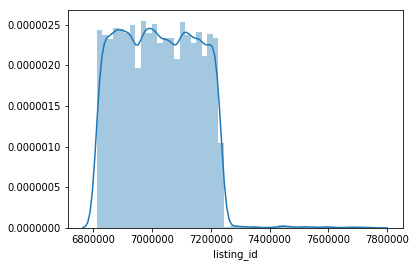

In [38]:
sns.distplot(train_df.listing_id.values, bins = 50, kde = True)
plt.xlabel('listing_id')
plt.show()

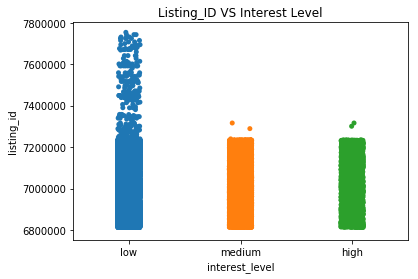

In [39]:
order = ['low', 'medium', 'high']
sns.stripplot(train_df.interest_level, train_df.listing_id, jitter=True, order=order)
plt.title("Listing_ID VS Interest Level")
plt.show()

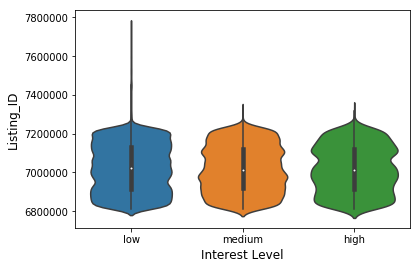

In [40]:
order = ['low', 'medium', 'high']
sns.violinplot(x="interest_level", y = 'listing_id', data = train_df, order = order)
plt.xlabel("Interest Level", fontsize = 12)
plt.ylabel('Listing_ID', fontsize = 12)
plt.show()

#### Number of Photos

图片数据非常大，我们首先来看一下数量特征

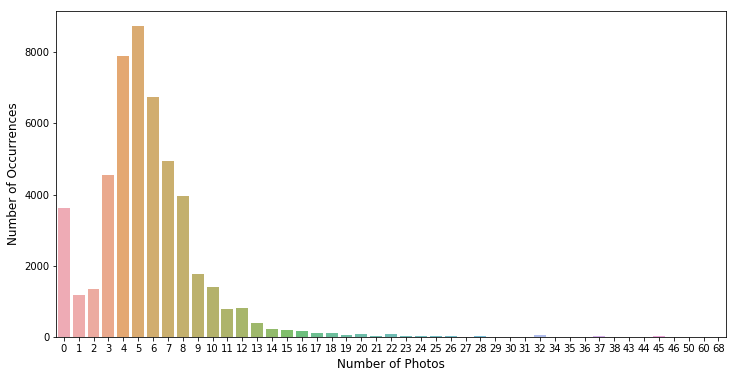

In [41]:
train_df["num_photos"] = train_df["photos"].apply(len)
cnt_srs = train_df['num_photos'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

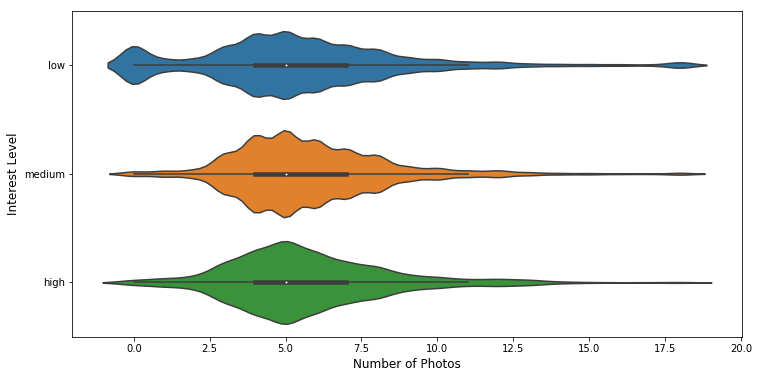

In [42]:
ulimit = np.percentile(train_df['num_photos'], 99)
train_df['num_photos'].loc[train_df['num_photos'] > ulimit] = ulimit
plt.figure(figsize=(12,6))
sns.violinplot(x="num_photos", y="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Number of Photos', fontsize=12)
plt.ylabel('Interest Level', fontsize=12)
plt.show()

#### Number of features
看看特征的数量和它的分布

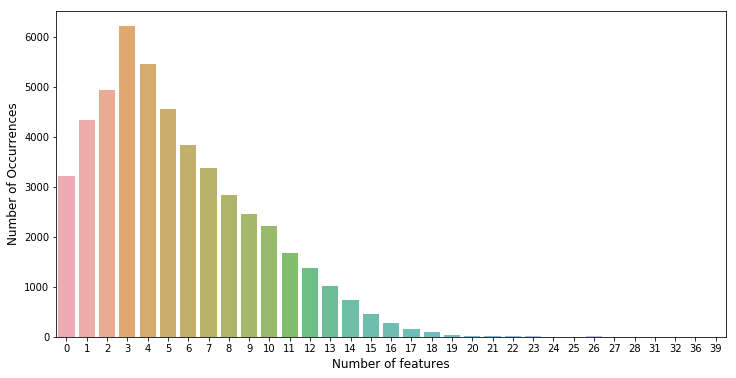

In [43]:
train_df["num_features"] = train_df["features"].apply(len)
cnt_srs = train_df['num_features'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of features', fontsize=12)
plt.show()

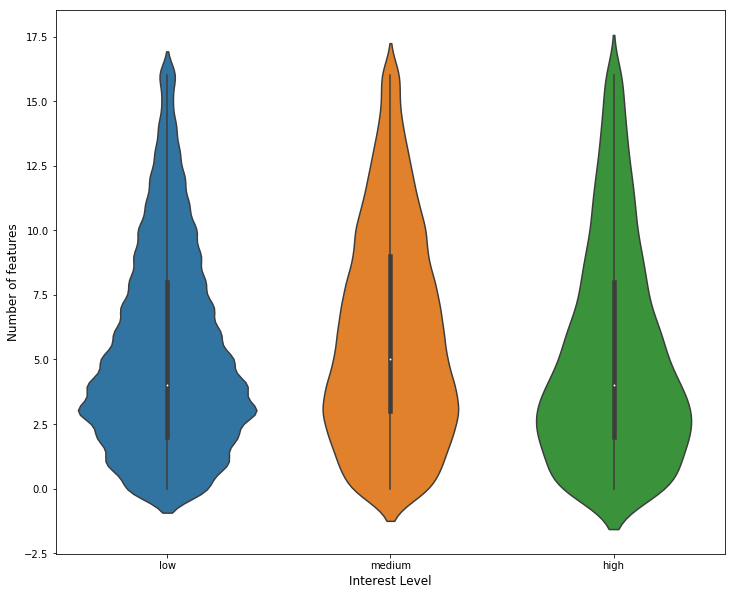

In [44]:
ulimit = np.percentile(train_df['num_features'], 99)
train_df['num_features'].loc[train_df['num_features'] > ulimit] = ulimit
plt.figure(figsize=(12,10))
sns.violinplot(y="num_features", x="interest_level", data=train_df, order =['low','medium','high'])
plt.xlabel('Interest Level', fontsize=12)
plt.ylabel('Number of features', fontsize=12)
plt.show()

#### description words counts 

In [45]:
train_df['num_description_words'] = train_df['description'].apply(lambda x: len(x.strip().split(" ")))
train_df['len_description'] = train_df['description'].apply(len)

#print(train_df['len_description'].head(10))
#print(train_df['num_description_words'].head(10))
#print(train_df['description'].iloc[0])
#print(len(train_df['description'].iloc[0]))

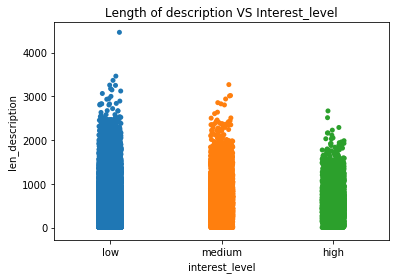

In [46]:
fig = plt.figure()
order = ['low', 'medium', 'high']

sns.stripplot(train_df['interest_level'], train_df['len_description'], jitter = True, order = order)
plt.title('Length of description VS Interest_level')
plt.show()

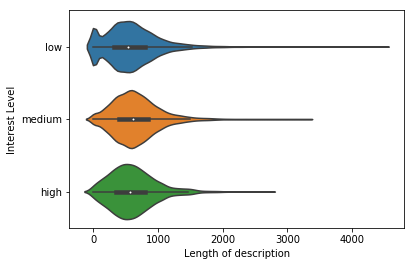

In [47]:
plt.figure()
sns.violinplot(x="len_description", y="interest_level", data = train_df, order = order)
plt.xlabel('Length of description')
plt.ylabel('Interest Level')
plt.show()

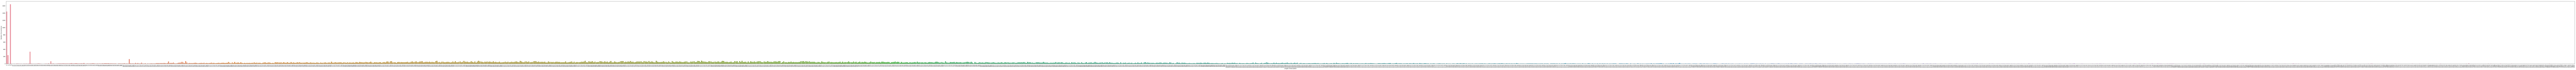

In [48]:
plt.figure(figsize=(400,10))
ax = sns.countplot(train_df.len_description)
plt.xticks(rotation='vertical')
plt.xlabel('Length of description')
plt.ylabel('Number of occurrences')
plt.show()

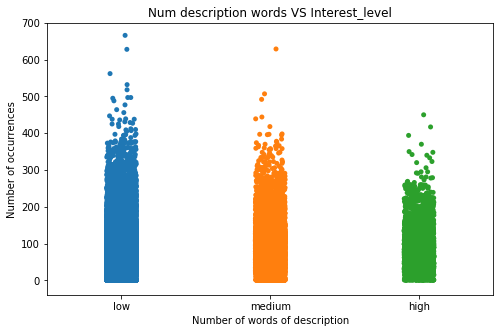

In [49]:
plt.figure(figsize=(8,5))
order = ['low', 'medium', 'high']
sns.stripplot(train_df['interest_level'], train_df['num_description_words'], jitter = True, order = order)
plt.title('Num description words VS Interest_level')
#plt.xticks(rotation='vertical')
plt.xlabel('Number of words of description')
plt.ylabel('Number of occurrences')
plt.show()

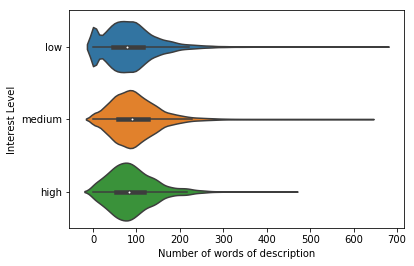

In [50]:
plt.figure()
sns.violinplot(x="num_description_words", y="interest_level", data = train_df, order = order)
plt.xlabel('Number of words of description')
plt.ylabel('Interest Level')
plt.show()

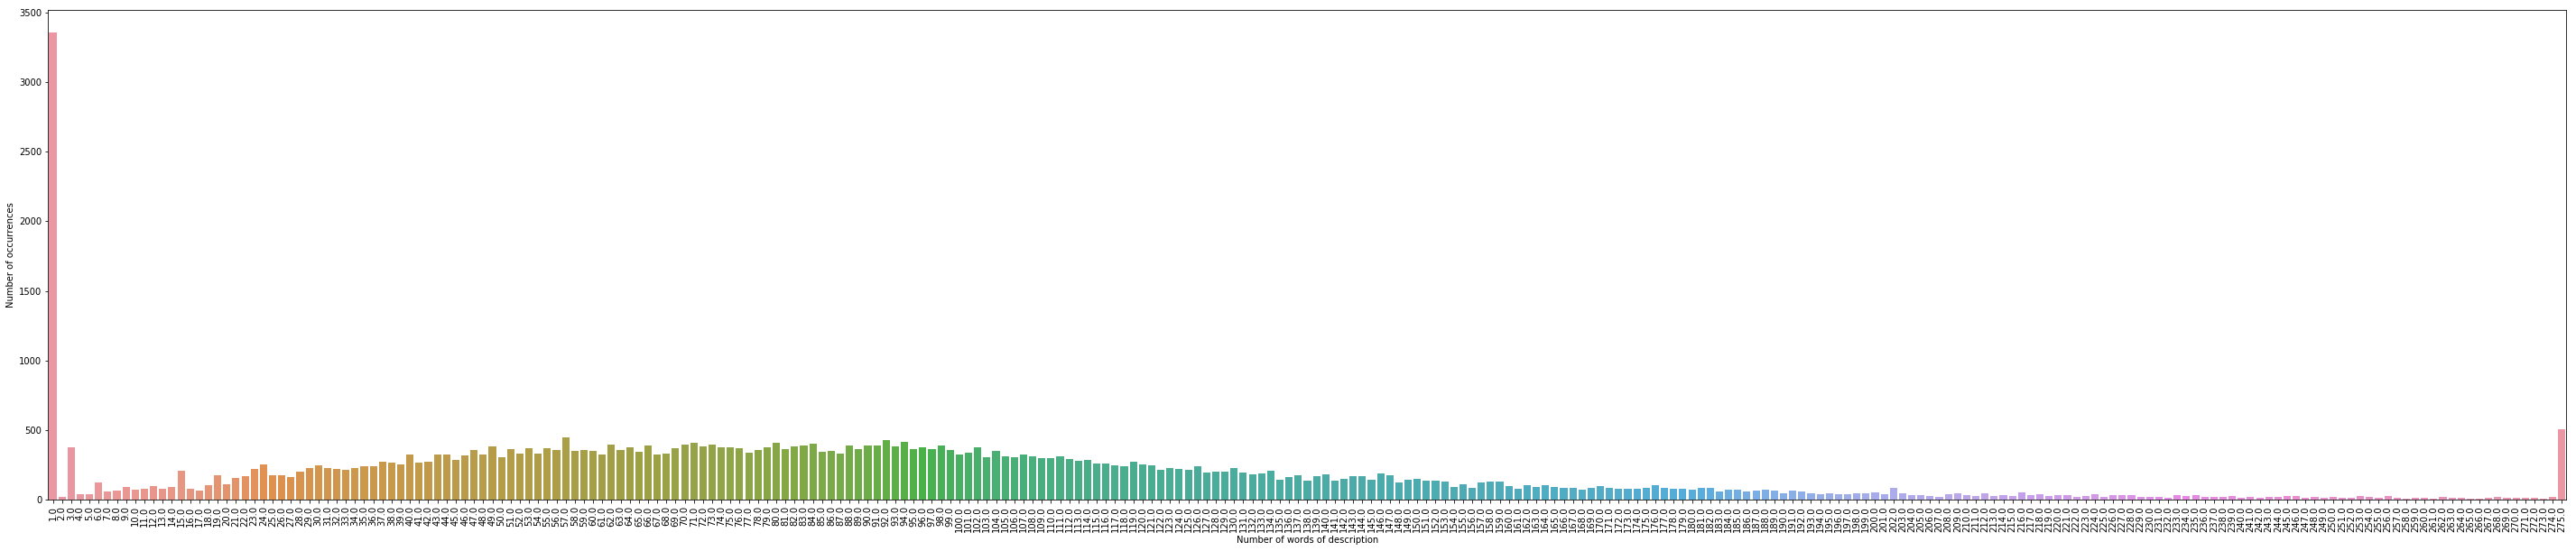

In [51]:
plt.figure(figsize=(50,10))
ulimit = np.percentile(train_df.num_description_words.values, 99)
llimit = np.percentile(train_df.num_description_words.values, 1)
train_df.num_description_words.loc[train_df.num_description_words > ulimit] = ulimit
train_df.num_description_words.loc[train_df.num_description_words < llimit] = llimit

ax = sns.countplot(train_df.num_description_words)
plt.xticks(rotation='vertical')
plt.xlabel('Number of words of description')
plt.ylabel('Number of occurrences')
plt.show()

### 词云(display_address, street_address, features)

In [53]:
from wordcloud import WordCloud

text = ''
text_da = ''
text_street = ''

#i = 0;
for ind, row in train_df.iterrows():
    #if(0 == i % 1000):
    #    print(i)
    
    for feature in row['features']:
        text = " ".join([text, "_".join(feature.strip().split(" "))])
    text_da = " ".join([text_da, "_".join(row['display_address'].strip().split(" "))])
    text_street = " ".join([text_street, "_".join(row['street_address'].strip().split(" "))])
    i = i + 1;
    
text = text.strip()
text_da = text_da.strip()
text_street = text_street.strip()

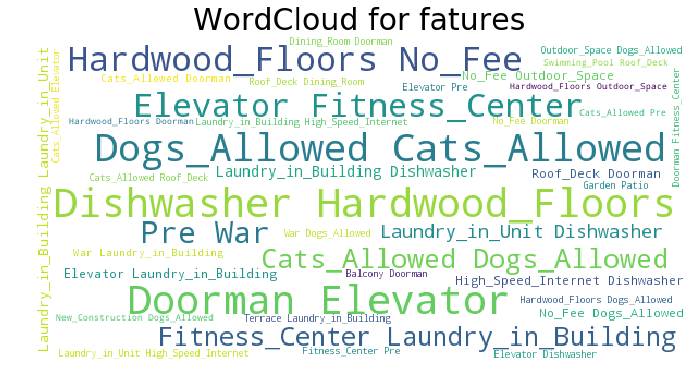

In [54]:
plt.figure(figsize=(12, 6))
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40)
wordcloud.generate(text)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title('WordCloud for fatures', fontsize=30)
plt.axis('off')
plt.show()

允许养猫和允许养狗，其实可以合并成允许养宠物！

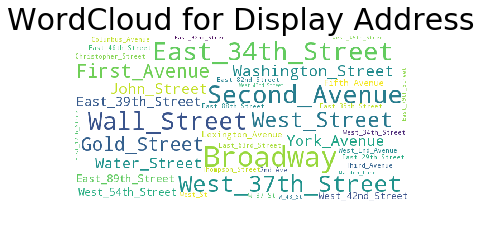

In [55]:
plt.figure()
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40)
wordcloud.generate(text_da)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("WordCloud for Display Address", fontsize=30)
plt.axis("off")
plt.show()

都是纽约比较繁华的街道！

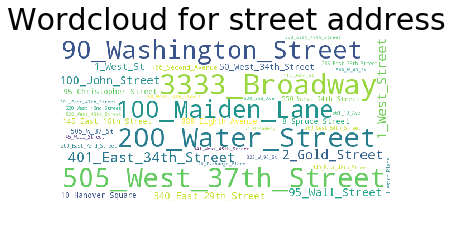

In [56]:
# wordcloud for street address
plt.figure()
wordcloud = WordCloud(background_color='white', width=600, height=300, max_font_size=50, max_words=40)
wordcloud.generate(text_street)
wordcloud.recolor(random_state=0)
plt.imshow(wordcloud)
plt.title("Wordcloud for street address", fontsize=30)
plt.axis("off")
plt.show()

### 特征之间的相关性

In [57]:
contFeaturelist = []
contFeaturelist.append('bathrooms')
contFeaturelist.append('bedrooms')
contFeaturelist.append('price')

print(contFeaturelist)

['bathrooms', 'bedrooms', 'price']


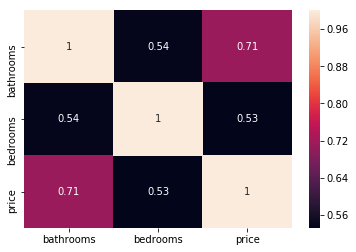

In [58]:
correlationMatrix = train_df[contFeaturelist].corr().abs()
plt.subplots()
sns.heatmap(correlationMatrix, annot=True)

#Mask unimportant features
sns.heatmap(correlationMatrix, mask=correlationMatrix < 1, cbar = False)
plt.show()

## 案例分析

### Rent Listing Inqueries 数据集的特征工程

#### 导入相应的包

import必要的工具包，用于文件的读取和特征编码

In [59]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from scipy import sparse

from sklearn.preprocessing import LabelEncoder

from sklearn.cluster import KMeans
from nltk.metrics import distance as distance

from sklearn.model_selection import StratifiedKFold

from MeanEncoder import MeanEncoder

#### 读取数据

In [60]:
dpath = './'
train = pd.read_json(dpath + 'train.json')
test = pd.read_json(dpath + 'test.json')
train.head().T

,10,10000,100004,100007,100013
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
building_id,53a5b119ba8f7b61d4e010512e0dfc85,c5c8a357cba207596b04d1afd1e4f130,c3ba40552e2120b0acfc3cb5730bb2aa,28d9ad350afeaab8027513a3e52ac8d5,0
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
features,[],"[Doorman, Elevator, Fitness Center, Cats Allow...","[Laundry In Building, Dishwasher, Hardwood Flo...","[Hardwood Floors, No Fee]",[Pre-War]
interest_level,medium,low,high,low,low
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
listing_id,7211212,7150865,6887163,6888711,6934781


#### 标签interest_level

**从类别型的标签interest_level编码为数字**

从前面的分析和常识来看，listing_id对确定interest_level没有用，去掉特征编码对训练集和测试集都要做，所以干脆将二者连起来一起处理

In [61]:
y_map = {'low' : 2 , 'medium' : 1 , 'high' : 0}
train['interest_level'] = train['interest_level'].apply(lambda x: y_map[x])
 
#y_train = train.interest_level.values
y_train = train.interest_level
train = train.drop(['listing_id' , 'interest_level'] , axis = 1)
 
listing_id = test.listing_id.values
test = test.drop('listing_id' , axis = 1)
 
ntrain = train.shape[0]
# concat函数是在pandas底下的方法，可以将数据根据不同的轴作简单的融合
train_test = pd.concat((train , test) , axis = 0).reset_index(drop = True)

In [62]:
print(y_train.head())

10        1
10000     2
100004    0
100007    2
100013    2
Name: interest_level, dtype: int64


#### price,bathrooms,bedrooms

数值型特征，+ / - / * / / ,特征的单调变换对XGBoost不必要

In [63]:
# remove some noise
ulimit = np.percentile(train_test.price.values , 99.99)
print(ulimit)

125420.51099969965


In [64]:
train_test['price'].loc[train_test['price'] > ulimit] = ulimit

In [65]:
# remove some noise
ulimit = np.percentile(train_test.bathrooms.values , 99.99)
print(ulimit)
outliers = train_test["bathrooms"].loc[train_test["bathrooms"] > ulimit]
print(outliers)

6.0
1990       10.0
17047       6.5
42573       7.0
69023     112.0
72329      20.0
97123       7.5
113071     20.0
121848      6.5
123666      6.5
Name: bathrooms, dtype: float64


In [66]:
#pandas.loc 选取指定列进行操作
#df.loc[行标签,列标签]df.loc['a':'b']#选取ab两行数据df.loc[:,'one']#选取one列的数据
#下面的代码是分别将bathrooms列中，值为112，10，20的值分别置换成1.5,1,2
train_test.loc[train_test["bathrooms"] == 112 , "bathrooms"] = 1.5
train_test.loc[train_test["bathrooms"] == 10 , "bathrooms"] = 1
train_test.loc[train_test["bathrooms"] == 20 , "bathrooms"] = 2

In [67]:
ulimit = np.percentile(train_test.bathrooms.values , 99.99)
print(ulimit)
outliers = train_test["bathrooms"].loc[train_test["bathrooms"] > ulimit]
print(outliers)

6.0
17047     6.5
42573     7.0
97123     7.5
121848    6.5
123666    6.5
Name: bathrooms, dtype: float64


**构造新特征**
1. price_bathrooms:单位bathroom的价格
2. price_bedrooms:单位bedroom的价格

In [68]:
train_test['price_bathrooms'] = (train_test["price"]) / (train_test["bathrooms"] + 1.0)
train_test['price_bedrooms'] = (train_test["price"] / (train_test["bedrooms"]) + 1.0)

**构造新特征**
1. room_diff: bathroom房间数 - bedrooms房间数
2. room_num: bathroom房间数 - bedroom房间数

In [69]:
train_test["room_diff"] = train_test["bathrooms"] - train_test["bedrooms"]
train_test["room_num"] = train_test["bedrooms"] + train_test["bathrooms"]

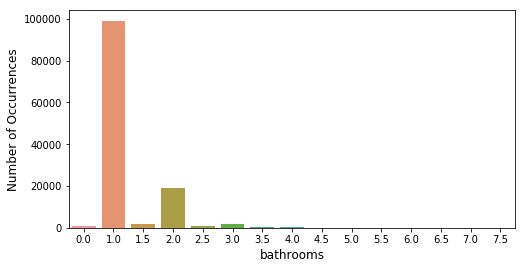

In [70]:
plt.figure(figsize=(8,4))
sns.countplot(train_test.bathrooms);
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

#### 创建日期

In [71]:
train_test['Date'] = pd.to_datetime(train_test['created'])
train_test['Year'] = train_test['Date'].dt.year
train_test['Month'] = train_test['Date'].dt.month
train_test['Day'] = train_test['Date'].dt.day
train_test['Wday'] = train_test['Date'].dt.dayofweek
train_test['Yday'] = train_test['Date'].dt.dayofyear
train_test['hour'] = train_test['Date'].dt.hour
 
train_test = train_test.drop(['Date', 'created'], axis=1)

#### description

In [72]:
# count of words present in description colum
train_test["num_description_words"] = train_test["description"].apply(lambda x: len(x.split(" ")))
train_test = train_test.drop(['description'] , axis = 1)

#### manager_id

将manager分为几个等级 top 1%， 2%， 5， 10， 15， 20， 25， 30， 50

In [73]:
def getTopXLimit(X, counted_feature_data):
    '''
    X: the top number
    counted_feature_data: counted single feature data
    functionality: return the top Xth limit of relevant feature
    '''
    top_limit = np.percentile(counted_feature_data.values, 100 - X)
    return top_limit

def getTopX(X, counted_feature_data):
    '''
    X: top number
    feature_data : counted feature data
    '''
    return counted_feature_data[counted_feature_data.values >= getTopXLimit(X, counted_feature_data)]

def storeTopX(X : int, source : dict, feature_name : str, to_data : dict, to_feature : str, isReturn: bool = False):
    '''
     X: top number
     source: source of data
     feature_name: name of feature
     to_data: <class 'dict'>,
     to_feature: name of stored feature
     return: to_data['top_X_' + to_feature]
    '''
    feature_counts = source[feature_name].value_counts();
    to_data[('top_{}_' + to_feature).format(X)] = source[feature_name].apply(lambda x: 1 if x in feature_counts.index.values[feature_counts.values >= getTopXLimit(X, feature_counts)] else 0)
    if isReturn:
        return to_data[('top_{}_' + to_feature).format(X)]
    else:
        return None

In [74]:
print(getTopX(1, train_test['manager_id'].value_counts()))

tops = [1, 2, 5, 10, 15, 20, 30, 50]
for i in tops:
    storeTopX(i,train_test, 'manager_id', train_test, 'manager_id', False)
    print("Stored top {} of manager id relevant to the number of rental inqueries".format(i))
    
print(train_test['top_1_manager_id'].head())

e6472c7237327dd3903b3d6f6a94515a    6387
6e5c10246156ae5bdcd9b487ca99d96a    1683
8f5a9c893f6d602f4953fcc0b8e6e9b4    1011
cb87dadbca78fad02b388dc9e8f25a5b     971
62b685cc0d876c3a1a51d63a0d6a8082     956
9df32cb8dda19d3222d66e69e258616b     862
2aa9bfa5f67ed9997ea341dee8a3a271     853
b7de4cb395920136663132057fa89d84     849
ad3d8ddc52c7e0859b5c6c7f7949c3bd     732
c9c33695ee2a2f818e9f1d8f7d1c4b39     731
1fb46c4a72bcf764ac35fc23f394760d     719
5599e962719af3ccc2976855c2d5893c     713
d2bce61e0e0079ebdc8c281e415e045b     677
aa9e353a6b43b125cbc89cb751090a9e     643
62826f3ae01f2ddc93b9cd28c659ab2b     585
dbbb6b990661b1e507a387f019bcb1a0     552
b209e2c4384a64cc307c26759ee0c651     538
612a00076aefe8c98d1df4835640c74b     523
8262449f40e9117f7a9ea49b4a333993     522
d1737922fe92ccb0dc37ba85589e6415     521
fc81b75568d3655a922523cb0d77ea5b     505
8b53ccf4338806ab1be3dd0267711649     482
1067e078446a7897d2da493d2f741316     470
eb5a6c4c2eb6f3e2a085c477afd5a815     441
d399821d8583b842

#### building_id

类似manager_id处理

In [75]:
print(getTopX(1, train_test['building_id'].value_counts()))

tops = [1, 2, 5, 10, 15, 20, 30, 50]
for i in tops:
    storeTopX(i,train_test, 'building_id', train_test, 'building_id', False)
    print("Stored top {} of building id relevant to the number of rental inqueries".format(i))
    
print(train_test.head(10))

0                                   20664
96274288c84ddd7d5c5d8e425ee75027      705
11e1dec9d14b1a9e528386a2504b3afc      546
bb8658a3e432fb62a440615333376345      522
80a120d6bc3aba97f40fee8c2204524b      510
ce6d18bf3238e668b2bf23f4110b7b67      459
f68bf347f99df026f4faad43cc604048      457
c94301249b8c09429d329864d58e5b82      410
ea9045106c4e1fe52853b6af941f1c69      397
128d4af0683efc5e1eded8dc8044d5e3      385
57ef86c28a8ae482dc3a3c3af28e8e48      373
8e3b8c607c3edcf3de131c24f0390179      367
9c18bf871b97492b96d8ddb800591f1b      362
cb14c4f807f23ecee1f7469b5159d2de      356
d0234abbc01a982d54e8d446acc03405      349
dd7b281c0dbafc8b53575ab78cca75d4      319
aed67db466854ec2aa5d249a032bc401      318
5565db9b7cba3603834c4aa6f2950960      314
18f6eb16d2f3e9885cb4a5d0a40791c6      313
093f64f52a6e43ba5e8f12bec8200554      308
1be9c496f7bdff4a552e3d4e91f915f8      308
7967a1280bf3f7644500fc79d2696b0e      306
ec12b4db154a9c75983f5e32edd93843      303
a01c99eb2cfdde327e1691e17d6696ba  

#### photos

In [76]:
train_test['photos_count'] = train_test['photos'].apply(lambda x: len(x))
train_test.drop(['photos'] , axis = 1 , inplace = True)

print(train_test['photos_count'].head(10))

0     5
1    11
2     8
3     3
4     3
5     5
6    10
7     5
8     5
9     9
Name: photos_count, dtype: int64


#### latitude,longtitude

聚类降维编码(#用训练数据训练，对训练数据和测试数据都做变换)到中心的距离(论坛上讨论到曼哈顿中心的距离更好)

In [77]:
# Clustering
ntrain = train.shape[0]
train_location = train_test.loc[:ntrain - 1, ['latitude', 'longitude']]
test_location = train_test.loc[ntrain:, ['latitude', 'longitude']]
 
kmeans_cluster = KMeans(n_clusters=20)
res = kmeans_cluster.fit(train_location)
res = kmeans_cluster.predict( pd.concat((train_location, test_location), axis=0).reset_index(drop=True))
 
train_test['cenroid'] = res
 
# L1 distance
center = [ train_location['latitude'].mean(), train_location['longitude'].mean()]
train_test['distance'] = abs(train_test['latitude'] - center[0]) + abs(train_test['longitude'] - center[1])

In [78]:
print(train_test['distance'].head())
print(train_test['cenroid'].head())

0    0.040260
1    0.064140
2    0.048829
3    0.024340
4    0.088971
Name: distance, dtype: float64
0    15
1    13
2    19
3     4
4    11
Name: cenroid, dtype: int32


#### display_address

In [79]:
train_test['display_address'] = train_test['display_address'].apply(lambda x: x.lower().strip())
print(train_test['display_address'].head())

0    metropolitan avenue
1        columbus avenue
2            w 13 street
3       east 49th street
4      west 143rd street
Name: display_address, dtype: object


#### street_address

In [80]:
train_test['street_address'] = train_test['street_address'].apply(lambda x: x.lower().strip())
print(train_test['street_address'].head())

0    792 metropolitan avenue
1        808 columbus avenue
2            241 w 13 street
3       333 east 49th street
4      500 west 143rd street
Name: street_address, dtype: object


#### 类别型特征

LableEncode

In [81]:
#categoricals = [x for x in train_test.columns if train_test[x].dtype == 'object']
categoricals = ['building_id', 'manager_id', 'display_address', 'street_address']
print(train_test.loc[:5, categoricals])

for feat in categoricals:
    lbl = LabelEncoder()
    lbl.fit(list(train_test[feat].values))
    train_test[feat] = lbl.transform(list(train_test[feat].values))

                        building_id                        manager_id  \
0  53a5b119ba8f7b61d4e010512e0dfc85  5ba989232d0489da1b5f2c45f6688adc   
1  c5c8a357cba207596b04d1afd1e4f130  7533621a882f71e25173b27e3139d83d   
2  c3ba40552e2120b0acfc3cb5730bb2aa  d9039c43983f6e564b1482b273bd7b01   
3  28d9ad350afeaab8027513a3e52ac8d5  1067e078446a7897d2da493d2f741316   
4                                 0  98e13ad4b495b9613cef886d79a6291f   
5  38a913e46c94a7f46ddf19b756a9640c  b209e2c4384a64cc307c26759ee0c651   

       display_address           street_address  
0  metropolitan avenue  792 metropolitan avenue  
1      columbus avenue      808 columbus avenue  
2          w 13 street          241 w 13 street  
3     east 49th street     333 east 49th street  
4    west 143rd street    500 west 143rd street  
5     west 18th street     350 west 18th street  


In [82]:
train_test.loc[:5, categoricals]

,building_id,manager_id,display_address,street_address
0,3797,1568,10955,21630
1,8986,1988,7967,21801
2,8889,3733,12368,8941
3,1848,282,9596,13018
4,0,2618,13640,17671
5,2544,3081,13763,13968


定义**高基数类别型特征编码函数** （manager_id, building_id, display_address,street_address ） 对这些特征进行**均值编码**（该特征值在每个类别的概率，即原来的一维特征变成了C-1维特征，C为标签类别数目）

In [83]:
from MeanEncoder import MeanEncoder

In [84]:
me = MeanEncoder(categoricals)
 
#trian
#import pdb
#pdb.set_trace()
train_new = train_test.iloc[:ntrain, :]
train_new_cat = me.fit_transform(train_new, y_train)
#test
test_new = train_test.iloc[ntrain:, :]
test_new_cat = me.transform(test_new)

C:\Users\ruito\Desktop\jupter\kaggle\Two Sigma Connect Rental Listing Inquiries\MeanEncoder.py:53: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  col_avg_y = X_train.groupby(by=variable, axis=0)['pred_temp'].agg({'mean': 'mean', 'beta': 'size'})
C:\Users\ruito\Desktop\jupter\kaggle\Two Sigma Connect Rental Listing Inquiries\MeanEncoder.py:38: RuntimeWarning: overflow encountered in exp
  self.prior_weight_func = lambda x: 1 / (1 + np.exp((x - 2) / 1))


In [85]:
print(train_new_cat.head(1).T)

                                  0
bathrooms                       1.5
bedrooms                          3
building_id                    3797
display_address               10955
features                         []
latitude                    40.7145
longitude                  -73.9425
manager_id                     1568
price                          3000
street_address                21630
price_bathrooms                1200
price_bedrooms                 1001
room_diff                      -1.5
room_num                        4.5
Year                           2016
Month                             6
Day                              24
Wday                              4
Yday                            176
hour                              7
num_description_words            95
top_1_manager_id                  0
top_2_manager_id                  1
top_5_manager_id                  1
top_10_manager_id                 1
top_15_manager_id                 1
top_20_manager_id           

#### features
描述特征文字长度 特征中单词的词频，相当于以数据集features中出现的词语为字典的one-hot编码（虽然是词频，但在这个任务中每个单词）

In [86]:
train_test['features']

0                                                        []
1         [Doorman, Elevator, Fitness Center, Cats Allow...
2         [Laundry In Building, Dishwasher, Hardwood Flo...
3                                 [Hardwood Floors, No Fee]
4                                                 [Pre-War]
5                                                        []
6         [prewar, elevator, Dogs Allowed, Cats Allowed,...
7         [Doorman, Elevator, Pre-War, Terrace, Laundry ...
8         [Cats Allowed, Dogs Allowed, Elevator, Laundry...
9                             [Dishwasher, Hardwood Floors]
10                                                       []
11        [prewar, dishwasher, HIGHRISE, ROOFDECK, EAT I...
12         [Doorman, Elevator, Laundry in Building, No Fee]
13        [Swimming Pool, Doorman, Fitness Center, No Fe...
14        [Elevator, Multi-Level, Laundry in Building, D...
15        [Doorman, Elevator, Fitness Center, Laundry in...
16                                      

In [87]:
train_test['features_count'] = train_test['features'].apply(lambda x: len(x))
train_test['features2'] = train_test['features']
train_test['features2'] = train_test['features2'].apply(lambda x: ' '.join(x))
 
c_vect = CountVectorizer(stop_words='english', max_features=300, ngram_range=(1, 1))
c_vect_sparse = c_vect.fit_transform(train_test['features2'])
c_vect_sparse_cols = c_vect.get_feature_names()
 
train_test.drop(['features', 'features2'], axis=1, inplace=True)
 
#hstack作为特征处理的最后一部，先将其他所有特征都转换成数值型特征才能处理
train_test_sparse = sparse.hstack([train_test, c_vect_sparse]).tocsr()

In [88]:
train_test['features_count']

0          0
1          5
2          4
3          2
4          1
5          0
6          8
7          8
8          4
9          2
10         0
11         7
12         4
13         6
14         5
15         5
16         1
17         5
18         3
19         2
20         4
21         9
22         2
23        10
24        12
25        12
26         3
27         8
28         0
29         8
          ..
123981    15
123982     7
123983     0
123984     4
123985    10
123986    10
123987    10
123988     4
123989     2
123990     3
123991     9
123992     3
123993     7
123994     4
123995     4
123996     5
123997     2
123998     6
123999     1
124000     9
124001     3
124002     6
124003    10
124004     1
124005     2
124006     3
124007     0
124008     6
124009     3
124010     3
Name: features_count, Length: 124011, dtype: int64

In [89]:
train_test_sparse

<124011x340 sparse matrix of type '<class 'numpy.float64'>'
	with 5216054 stored elements in Compressed Sparse Row format>

In [90]:
c_vect_sparse_cols

['1br',
 '24',
 '2br',
 '3br',
 '4br',
 'ac',
 'accepted',
 'access',
 'actual',
 'air',
 'allowed',
 'appliances',
 'approval',
 'approved',
 'apt',
 'area',
 'areas',
 'art',
 'assigned',
 'atm',
 'attended',
 'available',
 'ave',
 'baby',
 'backyard',
 'balconies',
 'balcony',
 'bar',
 'basement',
 'basketball',
 'bath',
 'bathroom',
 'baths',
 'bed',
 'bedford',
 'bedroom',
 'bedrooms',
 'bike',
 'billiards',
 'bldg',
 'blk',
 'blks',
 'brand',
 'breakfast',
 'brick',
 'bright',
 'brownstone',
 'brunch',
 'building',
 'built',
 'business',
 'cable',
 'case',
 'cats',
 'ceiling',
 'ceilings',
 'center',
 'central',
 'chef',
 'chefs',
 'children',
 'childrens',
 'city',
 'clean',
 'cleaning',
 'close',
 'closet',
 'closets',
 'club',
 'common',
 'community',
 'complimentary',
 'concierge',
 'conditioning',
 'condo',
 'construction',
 'cook',
 'countertops',
 'court',
 'courtyard',
 'deal',
 'deck',
 'deco',
 'decorative',
 'details',
 'dining',
 'dishwasher',
 'dogs',
 'doorman',
 'd

#### 特征处理结果存为文件

In [91]:
#存为csv格式方便用excel查看
train_test_new = pd.DataFrame(train_test_sparse.toarray())
X_train = train_test_new.iloc[:ntrain, :]
X_test = train_test_new.iloc[ntrain:, :]
 
train_new = pd.concat((X_train, y_train), axis=1).reset_index(drop=True)
train_new.to_csv(dpath + 'RentListingInquries_FE_train.csv', index=False)
X_test.to_csv(dpath + 'RentListingInquries_FE_test.csv', index=False)

In [92]:
from scipy.io import mmwrite
 
X_train_sparse = train_test_sparse[:ntrain, :]
X_test_sparse = train_test_sparse[ntrain:, :]
 
train_sparse = sparse.hstack([X_train_sparse, sparse.csr_matrix(y_train).T]).tocsr()
 
mmwrite(dpath + 'RentListingInquries_FE_train.txt',train_sparse)
mmwrite(dpath + 'RentListingInquries_FE_test.txt',X_test_sparse)
 
#存为libsvm稀疏格式，直接调用XGBoost的话用稀疏格式更高效
#from sklearn.datasets import dump_svmlight_file
#dump_svmlight_file(, y_train, dpath + 'RentListingInquries_FE_train.txt',X_train_sparse) 
#dump_svmlight_file(X_test_sparse,  dpath + 'RentListingInquries_FE_test.txt')

In [93]:
train_test_new = pd.DataFrame(train_test_sparse.toarray())
X_train = train_test_new.iloc[:ntrain, :]
X_test = train_test_new.iloc[ntrain:, :]
 
train_new = pd.concat((X_train, y_train), axis=1)